In [64]:
import pandas as pd
import numpy as np
import dates as dt

df = pd.read_csv('data/Pan Coil Change Data 11-24 thru 10-25.csv')
print("DataFrame shape:", df.shape)

# Set date type for date columns
df['DateTimeStamp'] = pd.to_datetime(df['DateTimeStamp'])
df['LoadDate'] = pd.to_datetime(df['LoadDate'])

# Extract day of year from date columns
df['DayOfYear'] = df['DateTimeStamp'].dt.dayofyear
df['LoadDayOfYear'] = df['LoadDate'].dt.dayofyear

# Make a column for the stile gauge
df['StileGauge'] = df['SmartPartNo'].str[12:13]

# Make a copy of the CoilId column and shift down by one
# then compare to see if the coil changed
df['CoilChange'] = df['CoilId'].shift(1) != df['CoilId']

# Count the number of unique coils used per day of year
unique_coils_per_day = df.groupby(by='DayOfYear', group_keys=True)['CoilId'].nunique()

# Count the number of coils changed per day of year
coils_changed_per_day = df.groupby(by='DayOfYear', group_keys=True)['CoilChange'].sum()

# Merge the two series into the DataFrame
coil_changes = pd.merge(unique_coils_per_day, coils_changed_per_day, on='DayOfYear', suffixes=('_UniqueCoils', '_CoilsChanged'))
coil_changes = coil_changes.rename(columns={'CoilId': 'UniqueCoils', 'CoilChange': 'CoilsChanged'})

# Export the DataFrame to a CSV file
coil_changes.to_csv('data/output.csv', index=True)

DataFrame shape: (214289, 4)


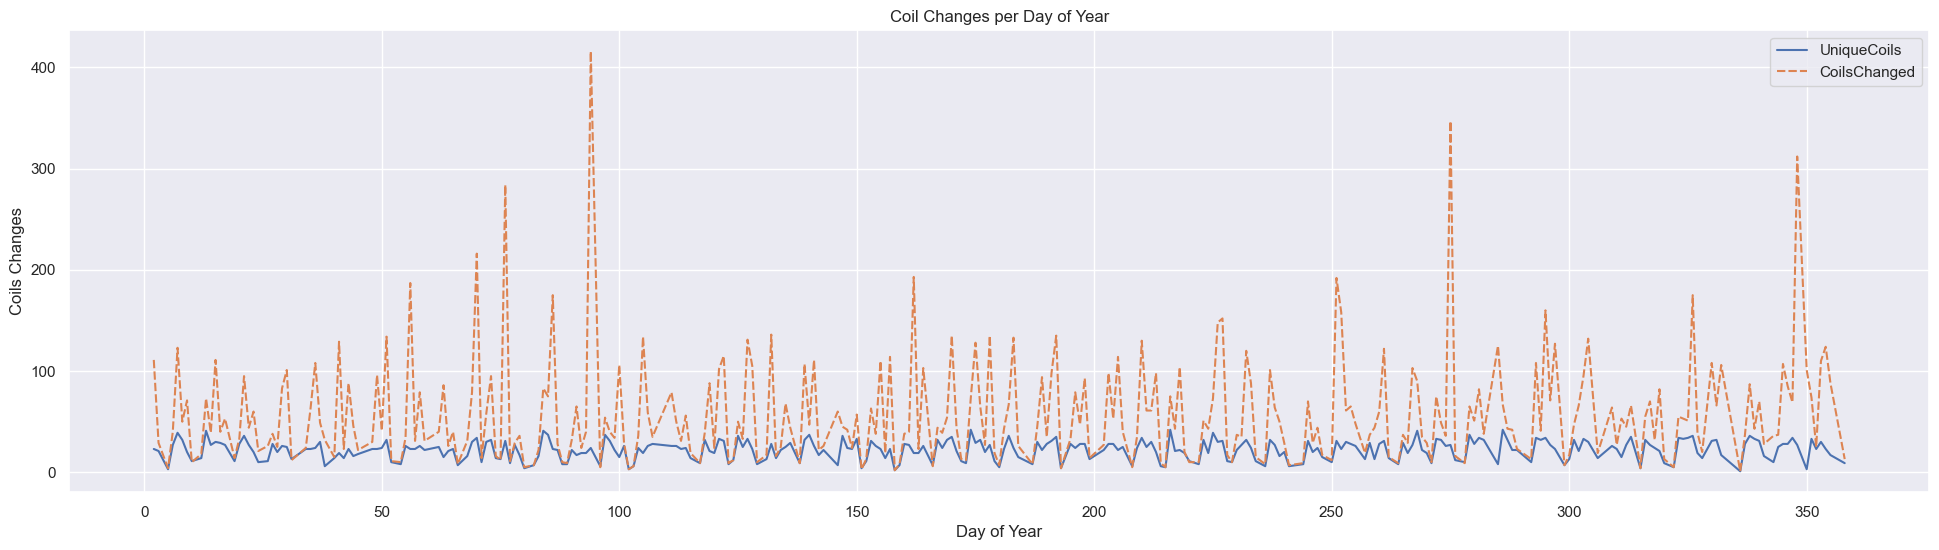

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(24,6)})
sns.lineplot(data=coil_changes)
plt.xlabel('Day of Year')
plt.ylabel('Coils Changes')
plt.title('Coil Changes per Day of Year')
plt.show()


In [17]:
df = pd.DataFrame({'A': [1, 2, 3, 4], 'B': [5, 5, 6, 8]})
print(df.head())
shifted_df = df['B'].shift(1) # Shift by 1 row
print("Shifted DataFrame 'B':")
print(shifted_df.head())
comparison = (df['B'] != shifted_df) # Element-wise comparison
print(comparison)

   A  B
0  1  5
1  2  5
2  3  6
3  4  8
Shifted DataFrame 'B':
0    NaN
1    5.0
2    5.0
3    6.0
Name: B, dtype: float64
0     True
1    False
2     True
3     True
Name: B, dtype: bool


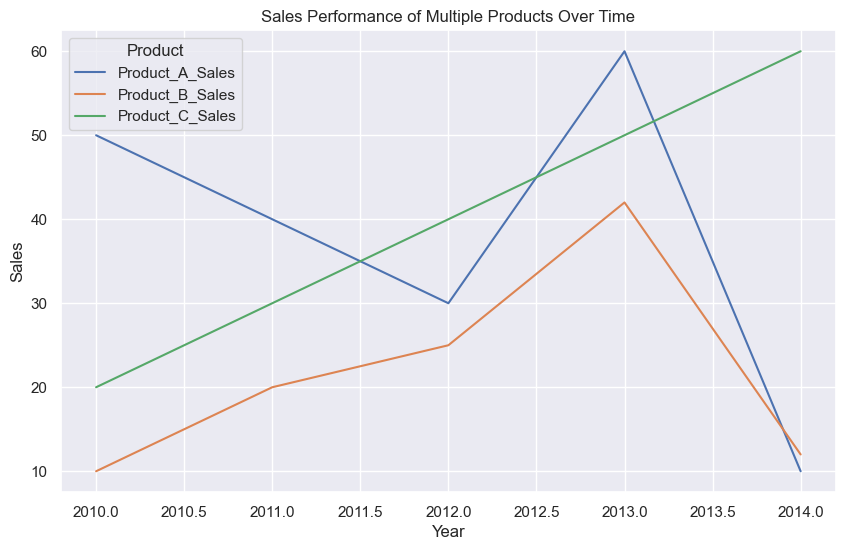

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame in wide format
data = {
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Product_A_Sales': [50, 40, 30, 60, 10],
    'Product_B_Sales': [10, 20, 25, 42, 12],
    'Product_C_Sales': [20, 30, 40, 50, 60]
}
df_wide = pd.DataFrame(data)

# Melt the DataFrame to long format
df_long = df_wide.melt(id_vars=['Year'], var_name='Product', value_name='Sales')

# Create the line plot with multiple lines
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='Year', y='Sales', hue='Product')
plt.title('Sales Performance of Multiple Products Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Product')
plt.grid(True)
plt.show()
